# Backpropagation Algorthm

Backpropagation is a fundamental algorithm used to train artificial neural networks, particularly deep learning models. It is the method by which neural networks learn from data by adjusting the weights of connections based on the error or loss. Understanding backpropagation is crucial for anyone working in machine learning and deep learning.

Iteration 0: Loss = 0.26164756176851484
Iteration 100: Loss = 0.25041322892400175
Iteration 200: Loss = 0.2488274549671997
Iteration 300: Loss = 0.24736360619881956
Iteration 400: Loss = 0.2449495606875659
Iteration 500: Loss = 0.24068648159920022
Iteration 600: Loss = 0.2336954345529817
Iteration 700: Loss = 0.2255131734305555
Iteration 800: Loss = 0.21502726697076507
Iteration 900: Loss = 0.20357207679733483


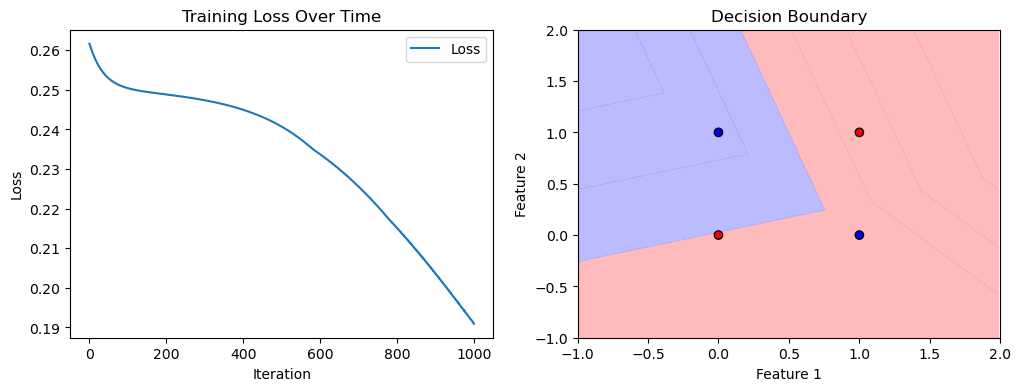

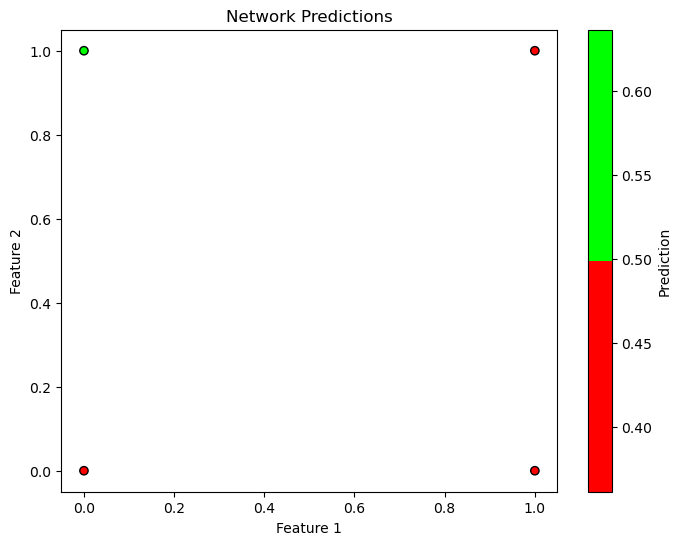

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Neural network parameters
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1
n_iterations = 1000

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Generate synthetic data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR problem

# Lists to store loss values
losses = []

# Training with plotting
for iteration in range(n_iterations):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss (Mean Squared Error)
    loss = np.mean((a2 - y) ** 2)
    losses.append(loss)

    # Backward pass
    error = a2 - y
    delta2 = error * sigmoid_derivative(z2)
    delta1 = np.dot(delta2, W2.T) * relu_derivative(z1)

    # Compute gradients
    dW2 = np.dot(a1.T, delta2) / X.shape[0]
    db2 = np.sum(delta2, axis=0, keepdims=True) / X.shape[0]
    dW1 = np.dot(X.T, delta1) / X.shape[0]
    db1 = np.sum(delta1, axis=0, keepdims=True) / X.shape[0]

    # Update weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Loss = {loss}")

# Plot the training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()

# Decision boundary plot
def plot_decision_boundary(X, y, W1, b1, W2, b2, ax):
    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = np.dot(relu(np.dot(Z, W1) + b1), W2) + b2
    Z = sigmoid(Z)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o', cmap=ListedColormap(['#FF0000', '#0000FF']))
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary')

# Create a plot for the decision boundary
plt.subplot(1, 2, 2)
plot_decision_boundary(X, y, W1, b1, W2, b2, plt.gca())
plt.show()

# Plot predictions
predictions = sigmoid(np.dot(relu(np.dot(X, W1) + b1), W2) + b2)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predictions.ravel(), cmap=ListedColormap(['#FF0000', '#00FF00']), edgecolors='k', marker='o')
plt.colorbar(label='Prediction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Network Predictions')
plt.show()


### Explanation of the Code

1. **Training Loss Plot**:
   - **`losses` List**: Tracks the loss at each iteration.
   - **Plotting**: Shows how the loss decreases over the training iterations, indicating the model's learning progress.

2. **Decision Boundary Plot**:
   - **Mesh Grid Creation**: Generates a grid of values to visualize the decision boundary.
   - **Decision Boundary Visualization**: Uses contour plots to show how the network classifies different regions of the input space.

3. **Prediction Visualization**:
   - **Predictions Plot**: Shows the predicted values for the XOR inputs, visualized with different colors to indicate predicted classes.

### Key Concepts Illustrated

- **Training Loss**: The training loss plot helps in understanding how effectively the neural network is learning and improving over time.
- **Decision Boundary**: The decision boundary plot provides a visual representation of how the network differentiates between classes based on the learned weights.
- **Predictions**: The predictions plot shows how the network’s output varies for different inputs, providing insights into the network’s performance on the XOR problem.